# How can we build a machine learning model in Python that accurately predicts the strength of a password (weak, medium, strong) based on its composition of letters, digits, and special characters? 

In [63]:
import pandas as pd
import numpy as np
import re

In [49]:
data = pd.read_csv("C:/Users/tajud/OneDrive/Desktop/NRIT/sudents and projects/S5/Classification/archive/data.csv", on_bad_lines='skip')


In [51]:
data

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1
...,...,...
669635,10redtux10,1
669636,infrared1,1
669637,184520socram,1
669638,marken22a,1


In [53]:
data.isna().sum()

password    1
strength    0
dtype: int64

In [55]:
data = data.dropna()

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 669639 entries, 0 to 669639
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   password  669639 non-null  object
 1   strength  669639 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [59]:
# Keep only rows where 'strength' is 0, 1, or 2 (as integers)
data = data[data['strength'].isin([0, 1, 2])]

# Convert to integer if needed (optional if already int)
data['strength'] = data['strength'].astype(int)

# Check value counts
print(data['strength'].value_counts())

strength
1    496801
0     89701
2     83137
Name: count, dtype: int64


In [65]:
def extract_features(pw):
    return {
        'length': len(pw),
        'has_digit': int(any(char.isdigit() for char in pw)),
        'has_upper': int(any(char.isupper() for char in pw)),
        'has_special': int(bool(re.search(r'[^A-Za-z0-9]', pw)))
    }

features = data['password'].apply(extract_features)
X = pd.DataFrame(features.tolist())
y = data['strength']  # Target variable

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,random_state=42)

# Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Train Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

# Evaluation
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred_lr))
print("\n✅ Accuracy Score:", accuracy_score(y_test, y_pred_lr))

✅ Confusion Matrix:
 [[17908     0     0]
 [    0 99516     3]
 [    0     0 16501]]

✅ Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17908
           1       1.00      1.00      1.00     99519
           2       1.00      1.00      1.00     16501

    accuracy                           1.00    133928
   macro avg       1.00      1.00      1.00    133928
weighted avg       1.00      1.00      1.00    133928


✅ Accuracy Score: 0.9999775999044263


# KNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune this value
knn.fit(X_train, y_train)

# Predict
y_pred_knn = knn.predict(X_test)

# Evaluation
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred_knn))
print("\n✅ Accuracy Score:", accuracy_score(y_test, y_pred_knn))

✅ Confusion Matrix:
 [[17908     0     0]
 [    0 99519     0]
 [    0     0 16501]]

✅ Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17908
           1       1.00      1.00      1.00     99519
           2       1.00      1.00      1.00     16501

    accuracy                           1.00    133928
   macro avg       1.00      1.00      1.00    133928
weighted avg       1.00      1.00      1.00    133928


✅ Accuracy Score: 1.0


# Naive Bayes

In [94]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Train Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Predict
y_pred_nb = nb.predict(X_test)

# Evaluation
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred_nb))
print("\n✅ Accuracy Score:", accuracy_score(y_test, y_pred_nb))

✅ Confusion Matrix:
 [[    0 17586   322]
 [    0 97768  1751]
 [    0  1303 15198]]


C:\Users\tajud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tajud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



✅ Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     17908
           1       0.84      0.98      0.90     99519
           2       0.88      0.92      0.90     16501

    accuracy                           0.84    133928
   macro avg       0.57      0.63      0.60    133928
weighted avg       0.73      0.84      0.78    133928


✅ Accuracy Score: 0.8434830655277462


C:\Users\tajud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# SVM

In [97]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Train SVM model
svm = SVC(kernel='linear', random_state=42)  # You can also try 'rbf' or 'poly'
svm.fit(X_train, y_train)

# Predict
y_pred_svm = svm.predict(X_test)

# Evaluation
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred_svm))
print("\n✅ Accuracy Score:", accuracy_score(y_test, y_pred_svm))

✅ Confusion Matrix:
 [[17908     0     0]
 [    0 99519     0]
 [    0     0 16501]]

✅ Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17908
           1       1.00      1.00      1.00     99519
           2       1.00      1.00      1.00     16501

    accuracy                           1.00    133928
   macro avg       1.00      1.00      1.00    133928
weighted avg       1.00      1.00      1.00    133928


✅ Accuracy Score: 1.0


# Decision Tree

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Train Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict
y_pred_dt = dt.predict(X_test)

# Evaluation
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred_dt))
print("\n✅ Accuracy Score:", accuracy_score(y_test, y_pred_dt))

✅ Confusion Matrix:
 [[17908     0     0]
 [    0 99519     0]
 [    0     0 16501]]

✅ Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17908
           1       1.00      1.00      1.00     99519
           2       1.00      1.00      1.00     16501

    accuracy                           1.00    133928
   macro avg       1.00      1.00      1.00    133928
weighted avg       1.00      1.00      1.00    133928


✅ Accuracy Score: 1.0


# Random Forest

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf.predict(X_test)

# Evaluation
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred_rf))
print("\n✅ Accuracy Score:", accuracy_score(y_test, y_pred_rf))

✅ Confusion Matrix:
 [[17908     0     0]
 [    0 99519     0]
 [    0     0 16501]]

✅ Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17908
           1       1.00      1.00      1.00     99519
           2       1.00      1.00      1.00     16501

    accuracy                           1.00    133928
   macro avg       1.00      1.00      1.00    133928
weighted avg       1.00      1.00      1.00    133928


✅ Accuracy Score: 1.0


# AdaBoost

In [106]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Train AdaBoost model
ab = AdaBoostClassifier(n_estimators=100, random_state=42)
ab.fit(X_train, y_train)

# Predict
y_pred_ada = ab.predict(X_test)

# Evaluation
print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ada))
print("\n Classification Report:\n", classification_report(y_test, y_pred_ada))
print("\n Accuracy Score:", accuracy_score(y_test, y_pred_ada))

C:\Users\tajud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


 Confusion Matrix:
 [[17908     0     0]
 [    0 99519     0]
 [    0     0 16501]]

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17908
           1       1.00      1.00      1.00     99519
           2       1.00      1.00      1.00     16501

    accuracy                           1.00    133928
   macro avg       1.00      1.00      1.00    133928
weighted avg       1.00      1.00      1.00    133928


 Accuracy Score: 1.0


# XG BOOST

In [109]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Train XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb.predict(X_test)

# Evaluation
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("\n✅ Accuracy Score:", accuracy_score(y_test, y_pred_xgb))

C:\Users\tajud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:39:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Confusion Matrix:
 [[17908     0     0]
 [    0 99519     0]
 [    0     0 16501]]

✅ Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17908
           1       1.00      1.00      1.00     99519
           2       1.00      1.00      1.00     16501

    accuracy                           1.00    133928
   macro avg       1.00      1.00      1.00    133928
weighted avg       1.00      1.00      1.00    133928


✅ Accuracy Score: 1.0


In [111]:
from sklearn.metrics import accuracy_score

accuracies = {
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "KNN": accuracy_score(y_test, y_pred_knn),
    "Naive Bayes": accuracy_score(y_test, y_pred_nb),
    "SVM": accuracy_score(y_test, y_pred_svm),
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "AdaBoost": accuracy_score(y_test, y_pred_ada),
    "XGBoost": accuracy_score(y_test, y_pred_xgb)
}

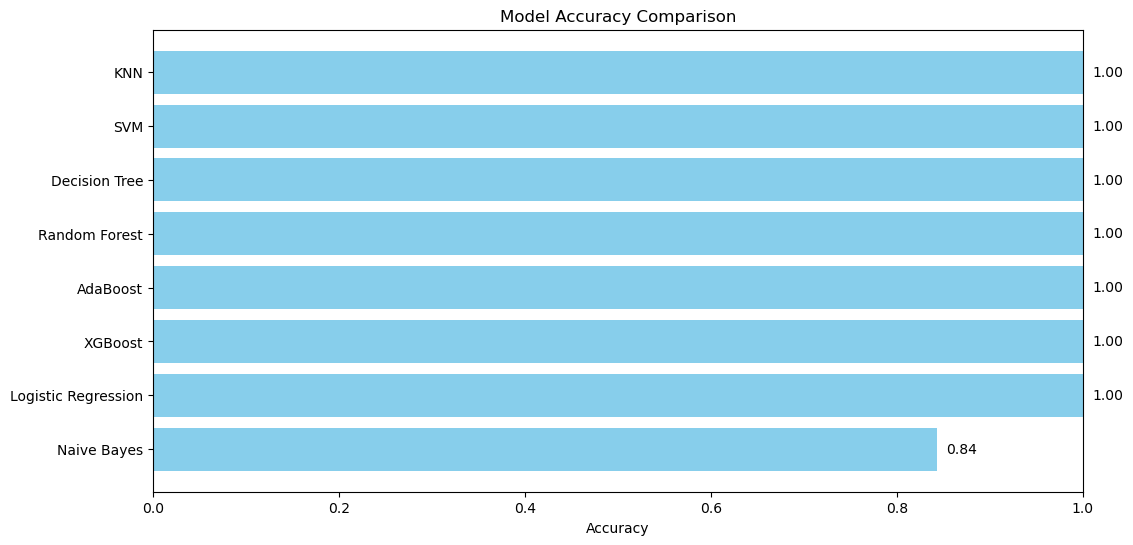

In [123]:
import matplotlib.pyplot as plt

# Sort by accuracy for better visualization
sorted_accuracies = dict(sorted(accuracies.items(), key=lambda x: x[1], reverse=True))

# Plot
plt.figure(figsize=(12, 6))
plt.barh(list(sorted_accuracies.keys()), list(sorted_accuracies.values()), color='skyblue')
plt.xlabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xlim(0, 1)
for index, value in enumerate(sorted_accuracies.values()):
    plt.text(value + 0.01, index, f"{value:.2f}", va='center')
plt.gca().invert_yaxis()  # Highest accuracy on top

plt.show()